# Linear methods for regression

## Ordinary least squares

Linear regression models the **output** or **target** variable $y \in \mathrm{R}$ as a linear combination of the $(P-1)$-dimensional input $x \in \mathrm{R}^{(P-1)}$. Let $X$ be the $N \times P$ matrix with each row an input vector (with a 1 in the first position), and similarly let $y$ be the $N$-dimensionnal vector of outputs in the **training set**, the linear model will prededict the $y$ given $X$ using the **parameters vector** or **weights vector** $\beta \in \mathrm{R}^P$ according to
$$
y = X\beta + \epsilon
$$
Where $\epsilon \in \mathrm{R}^N$ are the **residuals** or the errors of prediction. $\beta$ is found by minimizing an **objectif function** or $F(\beta)$ which is the **Loss function** ie. the error measured on the data. This error is the **sum of squared error (SSE) loss**

\begin{align}
F_{OLS}(\beta) &= \text{Loss}(\beta)\\
               &= \text{SSE}(\beta)\\
               &= \sum_i^N (y_i - x_i^T\beta)^2\\
               &= (y - X^T\beta)^T (y - X^T\beta)\\
               &= ||y - X^T\beta||_2^2
\end{align}

Which is a simple **ordinary least squares (OLS)** minimization.

## Linear regression with scikit-learn

Scikit learn offer many models for supervized learning, they all follow the same Application programming interface (API):

```
model = Estimator()
model.fit(X, y)
predictions = model.predict(X)
```\N

R-squared= 0.897194261083
Coefficients= [ 0.04575482  0.18799423]


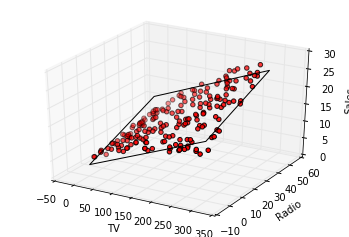

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import sklearn.metrics as metrics
%matplotlib inline

# Fit Ordinary Least Squares: OLS
csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = csv[['TV', 'Radio']]
y = csv['Sales']

lr = lm.LinearRegression().fit(X, y)
y_pred = lr.predict(X)
print("R-squared=", metrics.r2_score(y, y_pred))

print("Coefficients=", lr.coef_)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'], c='r', marker='o')

xx1, xx2 = np.meshgrid(
    np.linspace(csv['TV'].min(), csv['TV'].max(), num=10),
    np.linspace(csv['Radio'].min(), csv['Radio'].max(), num=10))


XX = np.column_stack([xx1.ravel(), xx2.ravel()])

yy = lr.predict(XX)
ax.plot_surface(xx1, xx2, yy.reshape(xx1.shape), color='None')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

## Overfitting

In statistics and machine learning, overfitting occurs when a statistical model describes random error or noise instead of the underlying relationship. Overfitting generally occurs when a model is **excessively complex**, such as having **too many parameters relative to the number of observations**. A model that has been overfit will generally have poor predictive performance, as it can exaggerate minor fluctuations in the data.

A learning algorithm is trained using some set of training samples. If the learning algorithm has the capacity to overfitt the training samples the performance on the **training sample set** will increases while the performance on unseen **test sample set** will decrease.

Overfitting phenomenon has three main explanations: excessively complex models, multicollinearity and high dimensionality.

### Model complexity

Complex learners with too many parameters relative to the number of observations may overfitt the training dataset.


### Multicollinearity

- Predictors are highly correlated, meaning that one can be linearly predicted from the others. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others. In case of perfect multicollinearity the predictor matrix is singular and therefore cannot be inverted. Under these circumstances, for a general linear model $y = X \beta + \epsilon$, the ordinary least-squares estimator $\beta_{OLS} = (X^{\top}X)^{-1}X^{\top}$ y does not exist.

Example with correlated predictor may produce unstable model:

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

bv = np.array([10, 20, 30, 40, 50])             # buisness volume
tax  = .2 * bv                                  # Tax
bp = .1 * bv + np.array([-.1, .2, .1, -.2, .1]) # business potential

X = np.column_stack([bv, tax])
beta_star = np.array([.1, 0])  # true solution

'''
Since tax and bv are correlated, there is an infinite number of linear combinations
leading to the same prediction.
'''
 
# 10 times the bv then subtract it 9 times using the tax variable: 
beta_medium = np.array([.1 * 10, -.1 * 9 * (1/.2)])
# 100 times the bv then subtract it 99 times using the tax variable: 
beta_large = np.array([.1 * 100, -.1 * 99 * (1/.2)])

# Check that all model lead to the same result
assert np.all(np.dot(X, beta_star) == np.dot(X, beta_medium))
assert np.all(np.dot(X, beta_star) == np.dot(X, beta_large))

Multicollinearity between the predictors:  buisness volumes and tax produces unstable models with arbitrary large coefficients.
![Multicollinearity between the predictors](images/shrinkage/ols_multicollinearity.png)

### High dimensionality

- High dimensions: large number of input feature. Linear predictor associate one parameter to each input feature. So high dimensional situation ($P$: number of features) with relatively small number of samples $N$ (so-called large $P$ small $N$ situation) generally lead to overfitting the training dataset. Thus it is generally a bad idea to add many input features into the learner. This phenomenon is called the **curse of dimensionality**.

So one of yhe most important criteria to choose a learning algorithm is based on the relative value of $P$ and $N$.

- Remenber that the "covariance" matrix $X^TX$ used in linear model is a $P \times P$ matrix of rank $\min(N, P)$. Thus if $P > N$ the equation system is overparameterized and admit an infinity of solutions that might be specific to the learning dataset. See also ill-conditioned or singular matrix.

- The sampling density of $N$ samples in a $N$-dimensional space is proportional to $N^{1/P}$. Thus high dimensional space are rapidelly very sparse, leading to poor estimation of samples densities.

- Another consequence of the sparse sampling in high dimensions is that all sample points are close to an edge of the sample. Consider N data points uniformly distributed in a p-dimensional unit ball centered at the origin. Suppose we consider a nearest-neighbor estimate at the origin. The median distance from the origin to the closest data point is given by the expression
$$
d(P, N) = (1 - \frac{1}{2}^N)^{1/P}
$$
A more complicated expression exists for the mean distance to the closest point. For N = 500, P = 10 , $d(P, N ) \approx 0.52$, more than halfway to the boundary. Hence most data points are closer to the boundary of the sample space than to any other data point. The reason that this presents a problem is that prediction is much more difficult near the edges of the training sample. One must extrapolate from neighboring sample points rather than interpolate between them.
(Source: T Ha.stie, R Tibshirani, J Friedman. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction.* Second Edition, 2009)

- Structural risk minimization has provided a theoretical background of this phenomenom (see VC dimension).

- See also Bias–variance tradeoff

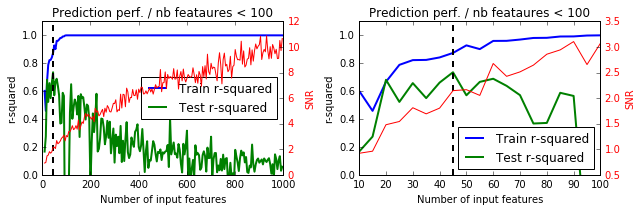

In [7]:
def fit_on_increasing_size(model):
    n_samples = 100
    n_features_ = np.arange(10, 1000, 5)
    r2_train, r2_test, snr = [], [], []
    for n_features in n_features_:
        # Sample the dataset (* 2 nb of samples)
        n_features_info = int(n_features/10)
        np.random.seed(42)  # Make reproducible
        X = np.random.randn(n_samples * 2, n_features)
        beta = np.zeros(n_features)
        beta[:n_features_info] = 1
        Xbeta = np.dot(X, beta)
        eps = np.random.randn(n_samples * 2)
        y =  Xbeta + eps
        # Split the dataset into train and test sample
        Xtrain, Xtest = X[:n_samples, :], X[n_samples:, :], 
        ytrain, ytest = y[:n_samples], y[n_samples:]
        # fit/predict
        lr = model.fit(Xtrain, ytrain)
        y_pred_train = lr.predict(Xtrain)
        y_pred_test = lr.predict(Xtest)
        snr.append(Xbeta.std() / eps.std())
        r2_train.append(metrics.r2_score(ytrain, y_pred_train))
        r2_test.append(metrics.r2_score(ytest, y_pred_test))
    return n_features_, np.array(r2_train), np.array(r2_test), np.array(snr)

def plot_r2_snr(n_features_, r2_train, r2_test, xvline, snr, ax):
    """
    Two scales plot. Left y-axis: train test r-squared. Right y-axis SNR.
    """
    ax.plot(n_features_, r2_train, label="Train r-squared", linewidth=2)
    ax.plot(n_features_, r2_test, label="Test r-squared", linewidth=2)
    ax.axvline(x=xvline, linewidth=2, color='k', ls='--')
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("Number of input features")
    ax.set_ylabel("r-squared")
    ax.legend(loc='best')
    ax.set_title("Prediction perf. / nb feataures < 100")
    ax_right = ax.twinx()
    ax_right.plot(n_features_, snr, 'r-', label="SNR", linewidth=1)
    ax_right.set_ylabel("SNR", color='r')
    for tl in ax_right.get_yticklabels():
        tl.set_color('r')

# Model = linear regression
lr = lm.LinearRegression()

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=lr)

argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 100 first features
plot_r2_snr(n_features[n_features <= 100], 
            r2_train[n_features <= 100], r2_test[n_features <= 100],
            argmax,
            snr[n_features <= 100],
            axis[1])
plt.tight_layout()

### Exercice

Read the code above and describe:

- Describe the datasets: $N$: `nb_samples`, $P$: `nb_features`.

- What is `n_features_info` ?

- Give the equation of the generative model.

- What is modified by the loop ?

- What is the SNR ?


Comment the graph above, in term of training and test performances

- How change the train and test peformances as a function of x ?

- Is it the expected results while it is compared to the SNR ?

- What can you conclude ?

## Ridge regression (L2-regularization)

Overfitting generally leads to excessively complex weights vector accounting for noise or spurious correlations within predictors. To avoid this phenomenon the learning should **constraint the solution** to fit a global pattern. This constraint will reduce (biased) the capacity of the learning algorithm. Adding such penalty will force the coeficients to be small, ie. to shrink toward zeros. So the objective function becomes:

\begin{align}
F_{Ridge}(\beta) &= \text{Loss}(\beta)  + \lambda~\text{penalty}(\beta)\\
                 &= \text{SSE}(\beta) + \lambda~\text{Euclidian norm}(\beta)^2\\
                 &= (y - X^T\beta)^T (y - X^T\beta) + \lambda \beta^T\beta
\end{align}

The $\beta$ that minimises the $F_{Ridge}(\beta)$ can be found:

\begin{align}
\nabla_{\beta}F_{Ridge}(\beta) &= 0\\
\nabla_{\beta}((y - X\beta)^T (y - X\beta) + \lambda \beta^T\beta) &= 0\\
\nabla_{\beta}((y^Ty - 2 \beta^TX^Ty + \beta^TX^TX\beta + \lambda \beta^T\beta)) &= 0\\
-2X^Ty + 2 X^TX\beta + 2 \lambda \beta &= 0\\
-X^Ty + (X^TX + \lambda I) \beta &= 0\\
(X^TX + \lambda I) \beta &= X^Ty\\
\beta &= (X^TX + \lambda I)^{-1} X^Ty
\end{align}

- The solution adds a positive constant to the diagonal of $X^TX$ before inversion. This makes the problem nonsingular, even if $X^TX$ is not of full rank, and was the main motivation for ridge regression.

- Increasing $\lambda$ will shrink the $\beta$ coefficients toward 0.

- This approach **penalizes** the objective function by the **Euclidian (L2) norm** of the coefficients.

Ridge penalty shrinks the coefficients toward zero. The figure shows: OLS solution on the left; on the middle panes: the L1 and L2 penalties; on the right pane: the penalized OLS. The latter show how penalties shrink the coefficients toward zero. The black points are the minimum found in each case. While the white points represents the true solution used to generate the data.

![L1 an L2 shrinkages](images/shrinkage/ols_l1_l2.png)

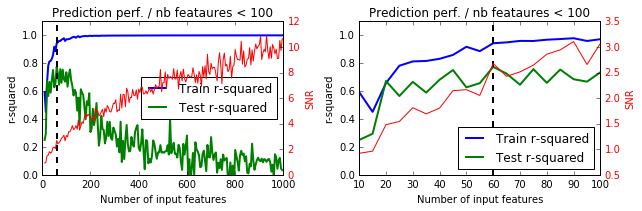

In [8]:
# Model = linear regression
# lambda is alpha !
ridge = lm.Ridge(alpha=10)

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=ridge)

argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 100 first features
plot_r2_snr(n_features[n_features <= 100], 
            r2_train[n_features <= 100], r2_test[n_features <= 100],
            argmax,
            snr[n_features <= 100],
            axis[1])
plt.tight_layout()

### Exercice

What benefit has been obtained with L2 regularization ?

## Lasso regression (L1-regularization)

The Lasso operator propose to penalize with the L1 norm of the coefficients. 
This constraint will reduce (biased) the capacity of the learning algorithm. Adding such penalty will force the coeficients to be small, ie. to shrink toward zeros. So the objective function becomes:

\begin{align}
F_{Ridge}(\beta) &= \text{Loss}(\beta)  + \lambda~\text{penalty}(\beta)\\
                 &= (y - X^T\beta)^T (y - X^T\beta) + \lambda~|\beta|_1
\end{align}

This penalty for some coefficients to be exactly null, providing a feature selection property.

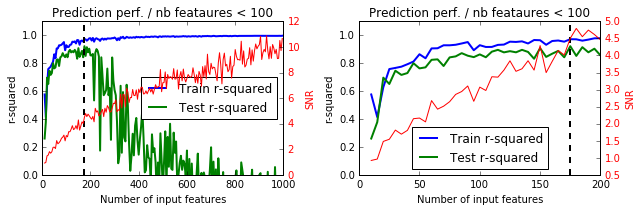

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import sklearn.metrics as metrics

# Model = linear regression
# lambda is alpha !
ridge = lm.Lasso(alpha=.1)

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=ridge)

argmax = n_features[np.argmax(r2_test)]

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])

# Right pane: Zoom on 200 first features
plot_r2_snr(n_features[n_features <= 200], 
            r2_train[n_features <= 200], r2_test[n_features <= 200],
            argmax,
            snr[n_features <= 200],
            axis[1])
plt.tight_layout()

### Exercice

What benefit has been obtained with L1 regularization ? Compare with L2 regularization ?